In [1]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np                          # linear algebra
import pandas as pd                         # data processing
import skfuzzy as fuzz                      # fuzzy logic
import matplotlib.pyplot as plt             # visualization
plt.style.use('seaborn-whitegrid')          # graph settings
plt.rcParams['figure.figsize'] = (10, 5)    # graph settings

# Memanggil Dataset

In [3]:
df = pd.read_csv('D:/A SEMESTER 5/TEORI HIMPUNAN SAMAR/heart.csv')
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


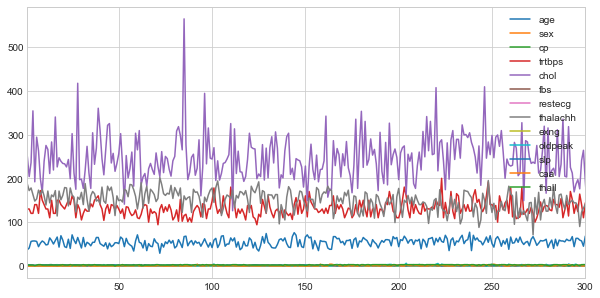

In [5]:
plt.plot(df.iloc[:, :13])
plt.legend(df.columns[:13])
plt.xlim(1, 300)
plt.show()

In [6]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Universe Variables

In [7]:
# Generate universe variables for input
X1_val = np.arange(0.0, 3.5, 0.5)
X2_val = np.arange(71.0, 202.0, 1.0)

# Membership Functions

In [8]:
# Fungsi keanggotaan untuk cp (Jenis Nyeri pada Dada))
X1_TypicalAngina  = fuzz.trimf(X1_val, [0.0, 0.0, 1.0])
X1_AtypicalAngina  = fuzz.trimf(X1_val, [0.0, 1.0, 2.0])
X1_NonAnginaPain = fuzz.trimf(X1_val, [1.0, 2.0, 3.0])
X1_Asymtomatic = fuzz.trimf(X1_val, [2.0, 3.0, 3.0])

# Fungsi keanggotaan untuk thalachh (Detak Jantung Maksimum)
X2_Rendah  = fuzz.trimf(X2_val, [71.0, 71.0, 141.0])
X2_Sedang = fuzz.trimf(X2_val, [111.0, 153.0, 194.0])
X2_Tinggi  = fuzz.trimf(X2_val, [141.0, 202.0, 202.0])

# Output variable
Y_PJK1 = 0
Y_PJK2 = 1

Berikut adalah visualisasi *universes* and *membership functions* yang bersangkutan.

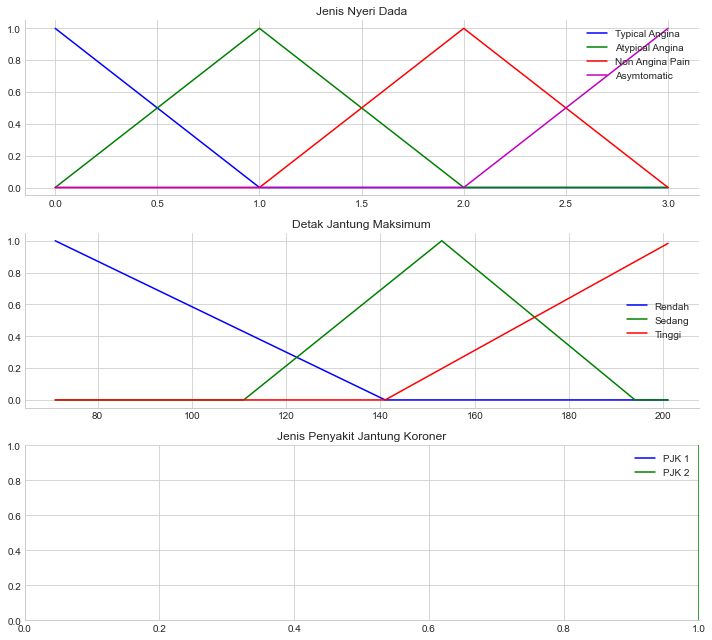

In [9]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 9))

ax0.plot(X1_val, X1_TypicalAngina, 'b', linewidth=1.5, label='Typical Angina')
ax0.plot(X1_val, X1_AtypicalAngina, 'g', linewidth=1.5, label='Atypical Angina')
ax0.plot(X1_val, X1_NonAnginaPain, 'r', linewidth=1.5, label='Non Angina Pain')
ax0.plot(X1_val, X1_Asymtomatic, 'm', linewidth=1.5, label='Asymtomatic')
ax0.set_title('Jenis Nyeri Dada')
ax0.legend()

ax1.plot(X2_val, X2_Rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(X2_val, X2_Sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(X2_val, X2_Tinggi, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Detak Jantung Maksimum')
ax1.legend()

ax2.axvline(x=Y_PJK1,c='b',label='PJK 1')
ax2.axvline(x=Y_PJK2,c='g',label='PJK 2')
ax2.set_title('Jenis Penyakit Jantung Koroner')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Fuzzy Rules Application

In [10]:
X1_level_TypicalAngina = fuzz.interp_membership(X1_val, X1_TypicalAngina, 2)
X1_level_AtypicalAngina  = fuzz.interp_membership(X1_val, X1_AtypicalAngina, 2)
X1_level_NonAnginaPain = fuzz.interp_membership(X1_val, X1_NonAnginaPain, 2)
X1_level_Asymptomatic = fuzz.interp_membership(X1_val, X1_Asymtomatic, 2)
   
X2_level_Rendah  = fuzz.interp_membership(X2_val, X2_Rendah, 164)
X2_level_Sedang = fuzz.interp_membership(X2_val, X2_Sedang, 164)
X2_level_Tinggi = fuzz.interp_membership(X2_val, X2_Tinggi, 164)

Untuk melakukan aktivasi dari fuzzy *membership functions* pada nilai tersebut di atas, kita mengaplikasikan rule yang tadi sudah dibuat.

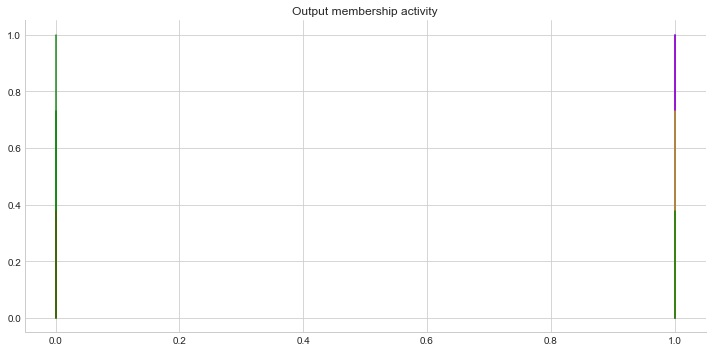

In [11]:
# Rule 1
rule1 = np.fmax(X1_level_TypicalAngina, X2_level_Rendah)  
# Rule 2
rule2 = np.fmax(X1_level_TypicalAngina, X2_level_Sedang)   
# Rule 3
rule3 = np.fmax(X1_level_TypicalAngina, X2_level_Tinggi)
# Rule 4
rule4 = np.fmax(X1_level_AtypicalAngina, X2_level_Rendah)
# Rule 5
rule5 = np.fmax(X1_level_AtypicalAngina, X2_level_Sedang)
# Rule 6
rule6 = np.fmax(X1_level_AtypicalAngina, X2_level_Tinggi)
# Rule 7
rule7 = np.fmax(X1_level_NonAnginaPain, X2_level_Rendah)
# Rule 8
rule8 = np.fmax(X1_level_NonAnginaPain, X2_level_Sedang)
# Rule 9
rule9 = np.fmax(X1_level_NonAnginaPain, X2_level_Tinggi)
# Rule 10
rule10 = np.fmax(X1_level_Asymptomatic, X2_level_Rendah)
# Rule 11
rule11 = np.fmax(X1_level_Asymptomatic, X2_level_Sedang)
# Rule 12
rule12 = np.fmax(X1_level_Asymptomatic, X2_level_Tinggi)

# Visualize this
fig, ax0 = plt.subplots()

ax0.plot([Y_PJK1, Y_PJK1], [0, rule1], 'b', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule2], 'g', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule3], 'r', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule4], 'y', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule5], 'm', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule6], 'c', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule7], 'g', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule8], 'b', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule9], 'm', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule10], 'r', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule11], 'y', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule12], 'g', linewidth=1.5, alpha=0.9)

ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Defuzzification

Selanjutnya dilakukan *defuzzification*. Kita menggunakan metode *weight average* dari area.

In [12]:
def weight_average(konsekuen,rules):
    konsekuen = np.array(konsekuen)
    rules = np.array(rules)
    WA = np.dot(rules,konsekuen) / sum(rules)
    return WA

In [13]:
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]
konsekuen = [Y_PJK1, Y_PJK1, Y_PJK1, Y_PJK1, Y_PJK2, Y_PJK2, Y_PJK1, Y_PJK2, Y_PJK2, Y_PJK2, Y_PJK2, Y_PJK2]

Prediksi Penyakit: 0.67


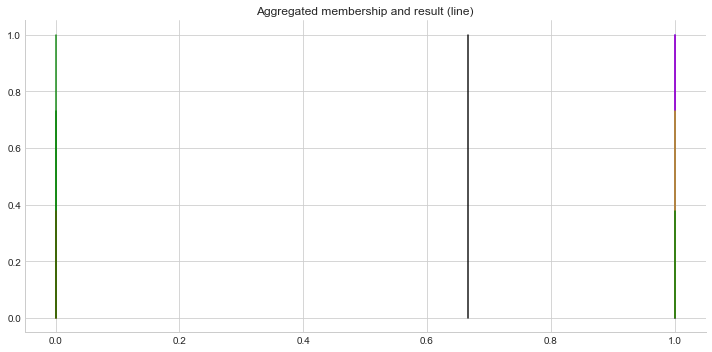

In [14]:
# Calculate defuzzified result
Ypred = weight_average(konsekuen,rules)

# Visualize this
fig, ax0 = plt.subplots()

ax0.plot([Y_PJK1, Y_PJK1], [0, rule1], 'b', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule2], 'g', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule3], 'r', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule4], 'y', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule5], 'm', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule6], 'c', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK1, Y_PJK1], [0, rule7], 'g', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule8], 'b', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule9], 'm', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule10], 'r', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule11], 'y', linewidth=1.5, alpha=0.9)
ax0.plot([Y_PJK2, Y_PJK2], [0, rule12], 'g', linewidth=1.5, alpha=0.9)

ax0.plot([Ypred, Ypred], 
[0, max(rule1, rule2, rule3, rule4, rule5, rule6, rule7, 
rule8, rule9, rule10, rule11, rule12)], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print('Prediksi Penyakit: %.2f' % Ypred)

# Prediksi Dataset

In [15]:
def predict(x1, x2):
    # Perform interpolation of our fuzzy membership functions at these values
    X1_level_TypicalAngina  = fuzz.interp_membership(X1_val, X1_TypicalAngina, x1)
    X1_level_Asymptomatic = fuzz.interp_membership(X1_val, X1_AtypicalAngina, x1)
    X1_level_NonAnginaPain = fuzz.interp_membership(X1_val, X1_NonAnginaPain, x1)
    X1_level_Asymptomatic = fuzz.interp_membership(X1_val, X1_Asymtomatic, x1)
    
    X2_level_Rendah  = fuzz.interp_membership(X2_val, X2_Rendah, x2)
    X2_level_Sedang = fuzz.interp_membership(X2_val, X2_Sedang, x2)
    X2_level_Tinggi  = fuzz.interp_membership(X2_val, X2_Tinggi, x2)

    # Rules
    # Rule 1
    rule1 = np.fmax(X1_level_TypicalAngina, X2_level_Rendah)  
    # Rule 2
    rule2 = np.fmax(X1_level_TypicalAngina, X2_level_Sedang)   
    # Rule 3
    rule3 = np.fmax(X1_level_TypicalAngina, X2_level_Tinggi)
    # Rule 4
    rule4 = np.fmax(X1_level_AtypicalAngina, X2_level_Rendah)
    # Rule 5
    rule5 = np.fmax(X1_level_AtypicalAngina, X2_level_Sedang)
    # Rule 6
    rule6 = np.fmax(X1_level_AtypicalAngina, X2_level_Tinggi)
    # Rule 7
    rule7 = np.fmax(X1_level_NonAnginaPain, X2_level_Rendah)
    # Rule 8
    rule8 = np.fmax(X1_level_NonAnginaPain, X2_level_Sedang)
    # Rule 9
    rule9 = np.fmax(X1_level_NonAnginaPain, X2_level_Tinggi)
    # Rule 10
    rule10 = np.fmax(X1_level_Asymptomatic, X2_level_Rendah)
    # Rule 11
    rule11 = np.fmax(X1_level_Asymptomatic, X2_level_Sedang)
    # Rule 12
    rule12 = np.fmax(X1_level_Asymptomatic, X2_level_Tinggi)

    # Rule aggregation & defuzzification
    rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12]
    konsekuen = [Y_PJK1, Y_PJK1, Y_PJK1, Y_PJK1, Y_PJK2, Y_PJK2, Y_PJK1, Y_PJK2, Y_PJK2, Y_PJK2, Y_PJK2, Y_PJK2]
    Ypred = weight_average(konsekuen,rules)
    return Ypred

Untuk melihat performa prediksi, kita menggunakan metric akurasi sebagai berikut.

In [16]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / len(y_true)

In [17]:
preds = []
for _, row in df[['cp', 'thalachh']].iterrows():
    x1 = row['cp']
    x2 = row['thalachh']
    preds.append(predict(x1, x2))
    
preds = np.round(preds)
print(f'Akurasi: %.2f' % accuracy(df['output'], preds))

Akurasi: 0.72


C:\Users\asus\AppData\Local\Temp/ipykernel_17480/427727254.py:4: RuntimeWarning: invalid value encountered in double_scalars
  WA = np.dot(rules,konsekuen) / sum(rules)


Dari perhitungan di atas diperoleh akurasi sebesar 0.72 atau 72%